<div><center><img src="https://ml.ucv.ai/logo.png\" width=150"/> </center></div>

# Tarea 1 - Material suplementario

## Tópicos en Inteligencia Artificial


* Alumno: JUAN FERNÁNDEZ
* Cédula: 28447019
----


Justificar **todas** sus respuestas.

Si utilizó una referencia, coloque link (de ser online) o nombre de trabajo, autor/es y página (de ser una referencia escrita de libro o paper).
- De ser para la sección teórica, debe reescribir o parafrasear con sus propias palabras la sección que desea usar y porqué la usó en la pregunta.
- De ser para la sección práctica, comente lo más posible el código usado de un tercero.



# Preguntas teóricas

## 1.1

Considere el siguiente código escrito en PyTorch

In [2]:
import torch
import torch.nn as nn


class ModeloSimple(nn.Module):
    def __init__(
        self,
        z,
        w,
        y
    ):
        super(ModeloSimple, self).__init__()
        self.fc1 = nn.Linear(
            in_features=y,
            out_features=z
        )
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(
            in_features=z,
            out_features=w
        )

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

Modifique el código y substituya las variables y, w, y z por las variables de entrada, salida y capas ocultas. Además, agregue la opción de usar como función de activación además de la presentada la tangente hiperbólica.

MODIFICACIÓN:

In [8]:
import torch
import torch.nn as nn


class ModeloSimple(nn.Module):
    def __init__(
        self,
        entrada,
        ocultas,
        salida, 
        activacion = "relu"
    ):
        
        super(ModeloSimple, self).__init__()
        self.fc1 = nn.Linear(
            in_features=entrada,
            out_features=ocultas
        )

        if activacion.lower() == "relu":
                self.activacion = nn.ReLU()
        elif activacion.lower() == "tanh":
                self.activacion = nn.Tanh()

        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(
            in_features=ocultas,
            out_features=salida
        )

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

## 1.2

Supongamos que modificamos la función de activación $f_i$ en las neuronas de la capa oculta de una red neuronal a la siguiente expresión:

$$f_i(x, y) = a_i x + b_i y + c_i \text{ con } i \in \{1,2, 3\}$$

La estructura de la red tiene 2 capas de entrada 1 capa oculta con 3 neuronas y 1 salida.

1. Escriba el diagrama de la red.
1. Qué particularidad tiene la función resultante?

### 1.2.b Respuesta

1. Diagrama de la red

La red tiene:

- Dos entradas: $x$ y $y$
- Una capa oculta con tres neuronas, cada una aplicando la función $f_i(x,y)$
- Una salida que es una combinación lineal de las salidas de las neuronas ocultas  

$$
\begin{align*}
\text{Entrada:} & \quad x,\ y \\
\\
\text{Capa Oculta:} & \quad
\begin{cases}
f_1(x, y) = a_1 x + b_1 y + c_1 \\
f_2(x, y) = a_2 x + b_2 y + c_2 \\
f_3(x, y) = a_3 x + b_3 y + c_3
\end{cases} \\
\\
\text{Salida:} & \quad
f(x, y) = w_1 f_1(x, y) + w_2 f_2(x, y) + w_3 f_3(x, y) + b
\end{align*}
$$

2. La particularidad es que la función final es completamente lineal respecto a las entradas $x$ y $y$, es decir, se comporta como una regresión lineal en ambas. Solo puede aprender planos, rectas o combinaciones lineales; nada de curva o saltos.


## Pregunta 2 de evaluaciones

Considere la siguiente superficie
$$
f(x, y)=\frac{\sin \left(0.8 \left(x^2+y^2\right)\right)}{\left(x^2+y^2\right)^{0.9}}
$$

In [9]:
import matplotlib.pyplot as plt
import torch
import matplotlib.cm as cm
import copy
import time

### Implemente la función usando `torch.sin` disponible en [PyTorch - Sin](https://pytorch.org/docs/stable/generated/torch.sin.html)




In [42]:
def f(x, y):
    r2 = x**2 + y**2 
    numerador = torch.sin(0.8 * r2)
    denominador = r2**0.9
    return numerador / denominador

### Parámetros de generación de datos

In [43]:
ruido = 0
mesh_dim = 40

### Funciones para generar los datos

In [45]:
def datos(ruido, mesh_dim):
  t = torch.linspace(-3, 3, mesh_dim)
  x, y = torch.meshgrid(t, t)
  z = f(x, y)
  z_noisy = z + ruido * torch.randn(mesh_dim, mesh_dim)

  return x, y, z, z_noisy

def dataset(x, y, z, z_noisy):
  x_train = torch.vstack([x.ravel(), y.ravel()]).T
  y_train = z_noisy.ravel()
  y_test = z.ravel()

  return x_train, y_train, y_test

def plot_surface(x, y, z_noisy):
  fig = plt.figure()
  ax = plt.axes(projection='3d')
  ax.plot_surface(x, y, z_noisy,cmap='viridis', edgecolor='none')
  ax.set_title('Superficie')
  plt.show()


In [46]:
x, y, z, z_ruido = datos(ruido, mesh_dim)

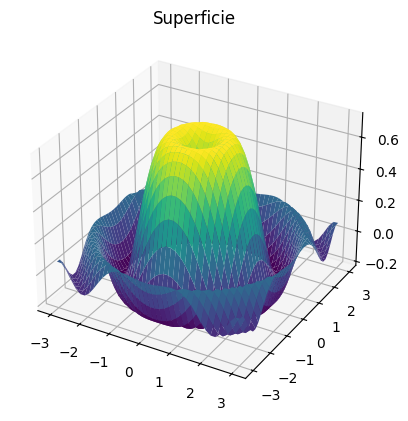

In [47]:
plot_surface(x, y, z_ruido)

In [48]:
x_train, y_train, y_test = dataset(x, y, z, z_ruido)

### Definiendo el modelo

La siguiente clase intenta definir una arquitectura de red neuronal que debe aproximar a $f(x, y)$. Identifique las dimensiones (entrada, salida) de la red sin importar la arquitectura.

Respuesta:

Se provee la estructura principal de la clase debe crear la arquitectura en el método `__init__` de tal manera de que tenga 3 capas lineales con dimensiones de entrada `neuronas_l1`, `neuronas_l2` y `neuronas_l3`. La función de activación debe ser la `ReLU` para todas las capas.

In [40]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

In [64]:
class Net3L(nn.Module):
    def __init__(self, neuronas_l1=10, neuronas_l2=10, neuronas_l3=10):
        super(Net3L, self).__init__()
        ##############################################
        #         Agregue red neuronal acá           #
        ##############################################
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, neuronas_l1),
            nn.ReLU(),
            nn.Linear(neuronas_l1, neuronas_l2),
            nn.ReLU(),
            nn.Linear(neuronas_l2, neuronas_l3),
            nn.ReLU(),
            nn.Linear(neuronas_l3, 1)
        )
        ##############################################
    def forward(self, x):
        return self.linear_relu_stack(x)

    def fit(self, x_train, y_train, optimizer, batch_size, n_epochs_max):
        # Crear el TensorDataset
        train_data = TensorDataset(x_train, y_train)

        # Crear el Data Loader
        train_loader = DataLoader(
            dataset=train_data, # 3
            batch_size=batch_size,
            shuffle= True # 4
        )

        # Creando el loop de entrenamiento
        loss_list = []
        for n_epochs in range(n_epochs_max):
            for x_batch, y_batch in train_loader:
                def closure():
                    optimizer.zero_grad()
                    output = self(x_batch) # 5
                    loss = nn.MSELoss()(output.squeeze(-1), y_batch)
                    loss.backward()
                    return loss
                loss = optimizer.step(closure)
            loss_list.append(loss.item())
        return loss_list

    def evaluate(self, x_test, y_test):
      y_pred = self(x_test).squeeze(-1)
      return (nn.MSELoss()(y_pred, y_test)).item()

### Entrenamiento

Modifique la entrada para que la capa lineal 1 tenga 60 neuronas, la 2 30 neuronas y la 3 20 neuronas.

In [ ]:
net = Net3L(neuronas_l1=60, neuronas_l2=30, neuronas_l3=20)

Modifique los valores en None

In [66]:
loss_list = net.fit(
    x_train, y_train,
    torch.optim.LBFGS(net.parameters(), lr=1, max_iter=1, line_search_fn='strong_wolfe'),
    1600, 2000
)

### Evaluación

Explique detalladamente la funcionalidad del siguiente gráfico y de nombre a los ejes

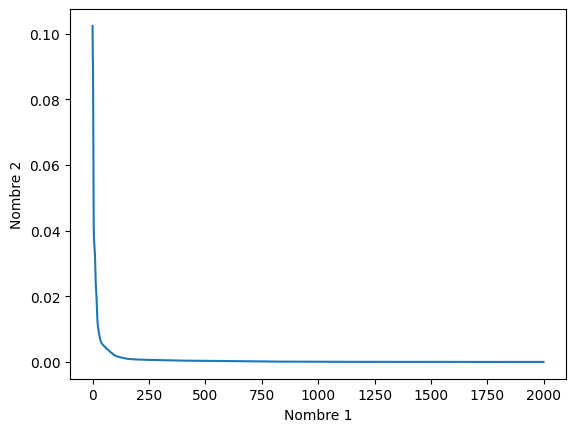

In [67]:
plt.figure()
plt.xlabel('Nombre 1')
plt.ylabel('Nombre 2')
plt.plot(loss_list)
plt.show()

### Predicción

In [68]:
y_pred = net(x_train).detach().squeeze(-1)

In [69]:
def plot_result(x, y, z1, z2):
  fig, ax = plt.subplots(1, 2, figsize=(10, 10), subplot_kw={'projection': '3d'})
  #
  ax[0].plot_trisurf(x, y, z1, vmin=y_train.min(), cmap=cm.viridis)
  ax[0].set_xlabel('x')
  ax[0].set_ylabel('y')
  ax[0].set_zlabel('z')
  ax[0].set_title('Superficie')
  #
  ax[1].plot_trisurf(x, y, (z1-z2)**2, vmin=0, cmap=cm.viridis)
  ax[1].set_xlabel('x')
  ax[1].set_ylabel('y')
  ax[1].set_zlabel('z')
  ax[1].set_title('Residuales cuadrados')
  plt.show()

Modifique la llamada de la siguiente función de tal manera que el primer gráfico muestre la superficie luego de la predicción y la segunda superfice la diferencia cuadrática entre predicciones y valores reales

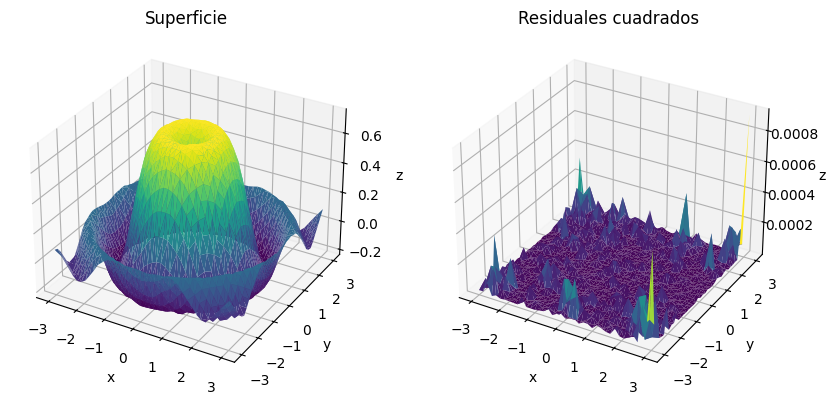

In [75]:
plot_result(x_train[:, 0].numpy(), x_train[:, 1].numpy(), y_pred.numpy(), y_test.numpy())

### plot_result(coordenada x, coordenada y, superficie predicha, superficie real sin ruido)

Finalmente, modifique el código para obtener el  error de entrenamiento y el error de prueba. Compare los valores.

In [77]:
print('Error entrenamiento:', net.evaluate(x_train, y_train))
print('Error de prueba:', net.evaluate(x_train, y_test))

Error entrenamiento: 2.173278699046932e-05
Error de prueba: 2.173278699046932e-05


### Analizando distintos optimizers

El siguiente segmento de código tarda alrededor de 5 minutos por cada ejecución. Su objetivo es investigar las diferencias entre los 3 optimizadores utilizados y responder las siguientes preguntas:

1. Cuál es el impacto del parámetro `ruido` en el proceso de optimización?
1. Cómo se diferencia el método del descenso del gradiente con el descenso estocástico y las versiones aceleradas?
1. Cómo impacta la dimensión de la red neuronal en el rendimiento del optimizador?
1. Intente analizar la diferencia entre épocas y el tiempo de convergencia de los algoritmos.

In [78]:
# Crear la red con numero de neuronas idéntico para cada capa
net = Net3L(50, 50, 50)

# Creamos una copia de la red de tal manera de que compartan la misma inicialización
net_list = [copy.deepcopy(net) for i in range(5)]

# Modifique a conveniencia el número de épocas para responder sus preguntas.
n_epochs = 2500
optim1 = torch.optim.SGD(params=net_list[0].parameters(), lr=0.05)
optim2 = torch.optim.SGD(params=net_list[1].parameters(), lr=0.1)
optim3 = torch.optim.SGD(params=net_list[2].parameters(), lr=0.1, momentum=0.9, nesterov= True)
optim4 = torch.optim.Adam(params=net_list[3].parameters())
optim5 = torch.optim.LBFGS(params=net_list[4].parameters(), lr=1, max_iter=1, line_search_fn='strong_wolfe')

optimizer_list = [optim1, optim2, optim3, optim4, optim5]
batch_sizes_list = [1600, 40, 400, 400, 1600]
times_list = []
loss_meta_list = []
eval_list = []

for i, optimizer in enumerate(optimizer_list):
    t0 = time.time()
    loss_list = net_list[i].fit(x_train, y_train, optimizer= optimizer, batch_size= batch_sizes_list[i], n_epochs_max= n_epochs)
    t1 = time.time()
    times_list.append(t1-t0)
    loss_meta_list.append(loss_list)
    eval_list.append(net_list[i].evaluate(x_train, y_test))

Pregunta #1. ¿Cuál es el impacto del parámetro ruido en el proceso de optimización?

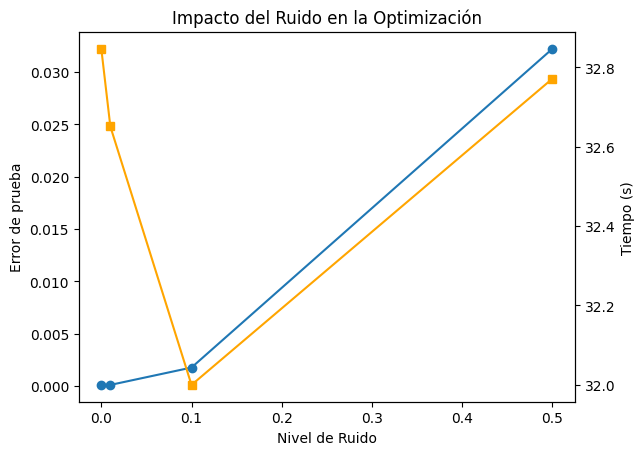

In [79]:
ruidos = [0, 0.01, 0.1, 0.5]
errors = []
times = []

for ruido in ruidos:
    x, y, z, z_ruido = datos(ruido, mesh_dim)
    x_train, y_train, y_test = dataset(x, y, z, z_ruido)
    
    net = Net3L(50, 50, 50)
    optimizer = torch.optim.Adam(net.parameters())
    
    t0 = time.time()
    net.fit(x_train, y_train, optimizer, batch_size=400, n_epochs_max=1500)
    t1 = time.time()
    
    error = net.evaluate(x_train, y_test)
    errors.append(error)
    times.append(t1 - t0)

plt.figure()
plt.plot(ruidos, errors, marker='o', label='Error de prueba')
plt.xlabel('Nivel de Ruido')
plt.ylabel('Error de prueba')
plt.twinx()
plt.plot(ruidos, times, marker='s', color='orange', label='Tiempo')
plt.ylabel('Tiempo (s)')
plt.title('Impacto del Ruido en la Optimización')
plt.show()


Pregunta #2 ¿Cómo se diferencia el método del descenso del gradiente con el descenso estocástico y las versiones aceleradas?

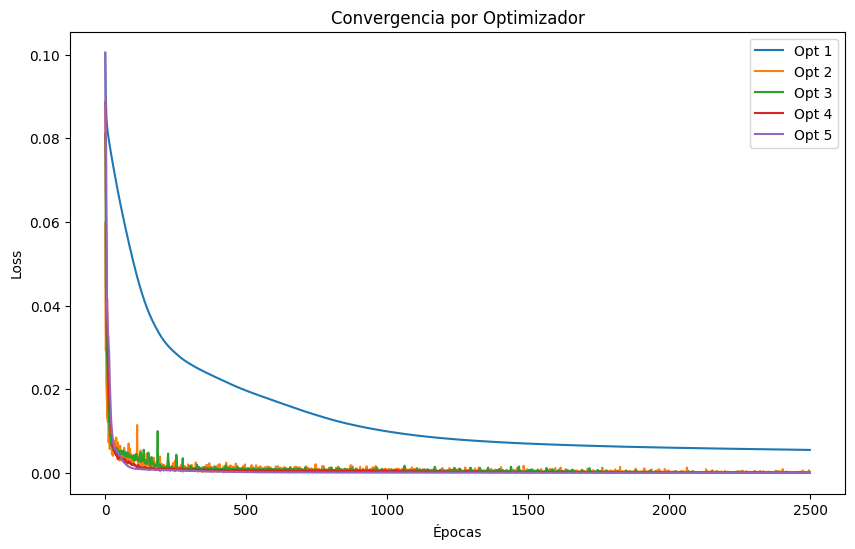

Optimizador 1: Tiempo = 49.92s | Error Prueba = 0.005463
Optimizador 2: Tiempo = 124.27s | Error Prueba = 0.000123
Optimizador 3: Tiempo = 52.68s | Error Prueba = 0.000086
Optimizador 4: Tiempo = 56.57s | Error Prueba = 0.000024
Optimizador 5: Tiempo = 67.76s | Error Prueba = 0.000013


In [81]:
# Gráfico Loss vs Epoch
plt.figure(figsize=(10,6))
for i, loss_list in enumerate(loss_meta_list):
    plt.plot(loss_list, label=f'Opt {i+1}')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Convergencia por Optimizador')
plt.legend()
plt.show()

for i in range(len(optimizer_list)):
    print(f"Optimizador {i+1}: Tiempo = {times_list[i]:.2f}s | Error Prueba = {eval_list[i]:.6f}")


Pregunta #3 ¿Cómo impacta la dimensión de la red neuronal en el rendimiento del optimizador?

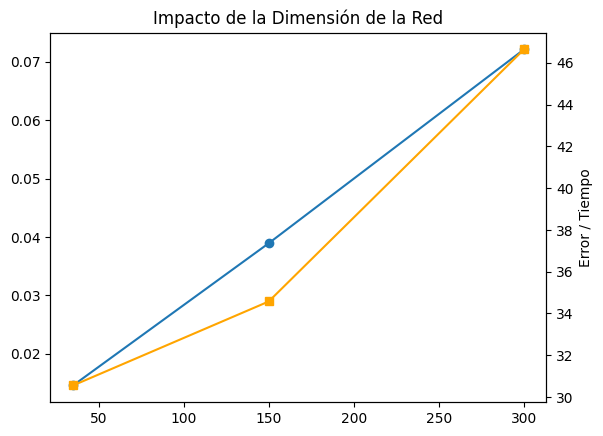

In [82]:
dimensiones = [(20, 10, 5), (50, 50, 50), (100, 100, 100)]
errors_dim = []
times_dim = []

for dims in dimensiones:
    net = Net3L(*dims)
    optimizer = torch.optim.Adam(net.parameters())
    t0 = time.time()
    net.fit(x_train, y_train, optimizer, batch_size=400, n_epochs_max=1500)
    t1 = time.time()
    error = net.evaluate(x_train, y_test)
    errors_dim.append(error)
    times_dim.append(t1 - t0)

neuronas_totales = [sum(dims) for dims in dimensiones]

plt.figure()
plt.plot(neuronas_totales, errors_dim, marker='o', label='Error de prueba')
plt.twinx()
plt.plot(neuronas_totales, times_dim, marker='s', color='orange', label='Tiempo')
plt.xlabel('Total de Neuronas en la Red')
plt.ylabel('Error / Tiempo')
plt.title('Impacto de la Dimensión de la Red')
plt.show()
